# MNIST Dataset contain data for images of digits 0 to 9

In [3]:
import tensorflow as tf

In [4]:
# Don't pay attention to this
# This is to keep kernel from dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [26]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.labels.shape # There are 10 classes which are one hot encoded for whole training data

(55000, 10)

In [9]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [10]:
mnist.test.images.shape

(10000, 784)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

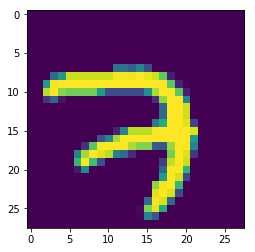

In [12]:
# Lets see first image of training data
first_image = mnist.train.images[0]
first_image = np.array(first_image , dtype = 'float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [72]:
# Initialise weights and biases
# No. of units in each layer :- 
n_input = 784
n_hidden_1 = 256  # We can choose no. of units for hidden layer by ourself
n_hidden_2 = 256
n_classes = 10

# We will create dictionary for weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [73]:
# Now make forward propogation function
def forward_propogation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1) # 'relu' is inbuilt activation function tensorflow neural network
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2']) #matmul - matrix multiplication
    out_layer2 = tf.nn.relu(in_layer2)
    
    # Here we are not applying any activation function on output
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out']) 
    return output

In [74]:
# create placeholder for input and output
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])
pred = forward_propogation(x,weights,biases)

In [75]:
# We will find cost by using cross entropy function which is same as the one we used in logistic regression
# We will take mean for cost of all prediction
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

In [76]:
#Using inbuilt tensorflow optimizer for weights and biases
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [77]:
# Now lets start a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [69]:
#after each iteration cost will decrease
for iter in range(30):
    c,_ = sess.run([cost,optimize],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
    print(c)

1672.7778
912.61316
703.35925
583.37396
478.97223
343.04437
245.08797
197.7256
182.44992
180.07837
173.07693
156.07428
136.91257
123.222984
115.30141
109.64542
104.07335
98.06573
92.05794
86.44747
81.39095
77.02778
73.21842
69.96321
67.23349
65.04114
63.322086
61.801422
60.201977
58.32801


In [70]:
predictions = tf.argmax(pred,1) # Find index of column with maximum value for each row
true_labels = tf.argmax(y,1)  # Find actual labels
correct_predictions = tf.equal(predictions,true_labels) # True value corresponding to equal match
pred_eval,correct_pred = sess.run([predictions,correct_predictions],feed_dict = {x:mnist.test.images,y:mnist.test.labels})


In [71]:
# percentage of prediction accuracy
(correct_pred.sum()/10000) * 100 

88.87

### So this is our current accuracy is 88.87%

## Now instead of supplying whole training data in each iteration of optimizer lets send data in small batches. This is batch gradient descent.

In [78]:
# Taking batch size of 100 for 55000 training data points
batch_size = 100
for iter in range(30):
    num_batches = int(mnist.train.num_examples/batch_size) # num_examples give no. of data points in train/test
    total_cost = 0
    for j in range(num_batches):
        x_batch,y_batch = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimize],feed_dict = {x : x_batch,y : y_batch})
        total_cost += c
    print(total_cost)

24954.501386642456
4528.775805815646
2428.025088553497
1636.9526819525252
1327.5684174113967
1172.0743447719387
1069.9434544774206
889.4856751825387
766.8055818831805
664.7230994256987
670.380492141031
598.0254120226209
519.3761736238463
471.5182979688079
479.4317365480034
440.28444354447066
356.6282222299319
357.5140780153414
286.0917191410079
257.84451768144413
185.2461861547199
221.40443380412012
184.63599720801687
157.32484594585296
182.34191820784906
141.41765187843657
106.58610978650266
108.74878994207819
106.4104471992614
79.79975043678587


In [79]:
predictions = tf.argmax(pred,1) # Find index of column with maximum value for each row
true_labels = tf.argmax(y,1)  # Find actual labels
correct_predictions = tf.equal(predictions,true_labels) # True value corresponding to equal match
pred_eval,correct_pred = sess.run([predictions,correct_predictions],feed_dict = {x:mnist.test.images,y:mnist.test.labels})

In [80]:
# percentage of prediction accuracy
(correct_pred.sum()/10000) * 100 

96.04

### So our accuracy is 96.04% which is a great improvement